This Pandas and matplotlib exercise arose as I was exploring the NYC OpenData record of 311 calls. The NYC 311 call data provides an opportunity to work with massive data sets. The data I used here is a record of all 311 calls in NYC in 2024, comprising well in excess of 3 million records. The initial value_counts of complaint types exploration piqued my curiosity about how the distribution of complaint types varies by borough. I would like to eventually come back to this and look for seasonal trends and plot the results on a map or an animation. Data available [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data).


In [1]:
# setting up the tools and inline plotting
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# ggplot makes the graphs bigger and better looking than the default
plt.style.use('ggplot')

# I like to have these set to larger values so that I can view more of the DataFrames as I explore the data
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 1000)

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
# Because of mixed types, specify unicode to prevent any errors. This file contains more than 3 million rows, the entire 311 data set from 2024.
complaints = pd.read_csv('311-service-requests.csv', dtype='unicode')

In [3]:
#clean "Unspecified" values from the Borough column as these counts were small and typically novel complaints realative to what 
# is commonly observed in the named Boroughs.
filt = (complaints["Borough"] != "Unspecified")
complaints_filt = complaints[filt]

In [4]:
complaints_filt.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,63574066,12/31/2024 06:38:11 PM,12/31/2024 06:51:20 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11234,1596 EAST 45 STREET,EAST 45 STREET,AVENUE L,AVENUE M,AVENUE L,AVENUE M,ADDRESS,BROOKLYN,EAST 45 STREET,NaN,Closed,NaN,The Police Department responded to the complai...,12/31/2024 06:51:23 PM,18 BROOKLYN,3078420060,BROOKLYN,1003114,165837,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.62184065088322,-73.93204754759272,"(40.62184065088322, -73.93204754759272)"
1,63576601,12/31/2024 06:38:04 PM,01/02/2025 04:29:32 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466,655 EAST 230 STREET,EAST 230 STREET,CARPENTER AVENUE,LOWERRE PLACE,CARPENTER AVENUE,LOWERRE PLACE,ADDRESS,BRONX,EAST 230 STREET,NaN,Closed,NaN,The Police Department responded to the complai...,01/02/2025 04:29:43 PM,12 BRONX,2048330028,BRONX,1022911,264242,MOBILE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.89187241649303,-73.86016845296459,"(40.89187241649303, -73.86016845296459)"
2,63574887,12/31/2024 06:38:01 PM,01/02/2025 05:08:04 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466,655 EAST 230 STREET,EAST 230 STREET,CARPENTER AVENUE,LOWERRE PLACE,CARPENTER AVENUE,LOWERRE PLACE,ADDRESS,BRONX,EAST 230 STREET,NaN,Closed,NaN,The Police Department responded to the complai...,01/02/2025 05:09:53 PM,12 BRONX,2048330028,BRONX,1022911,264242,MOBILE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.89187241649303,-73.86016845296459,"(40.89187241649303, -73.86016845296459)"
3,63583821,12/31/2024 06:38:00 PM,01/02/2025 07:51:00 PM,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11225,993 PRESIDENT STREET,PRESIDENT STREET,FRANKLIN AVENUE SHUTTLE LINE,FRANKLIN AVE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Environmental Protection req...,01/02/2025 07:51:00 PM,09 BROOKLYN,3011870064,BROOKLYN,995527,183036,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.66906109545815,-73.95934890437844,"(40.66906109545815, -73.95934890437844)"
4,63578396,12/31/2024 06:38:00 PM,NaN,DEP,Department of Environmental Protection,Sewer,Manhole Overflow (Use Comments) (SA1),NaN,10306,NaN,NaN,NaN,NaN,HYLAN BOULEVARD,PRESCOTT AVENUE,INTERSECTION,STATEN ISLAND,NaN,NaN,Open,NaN,NaN,NaN,02 STATEN ISLAND,NaN,STATEN ISLAND,955016,148769,PHONE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.574964327830195,-74.10523367854763,"(40.574964327830195, -74.10523367854763)"


In [5]:
complaint_counts = complaints_filt['Complaint Type'].value_counts()

<Axes: xlabel='Complaint Type', ylabel='total calls'>

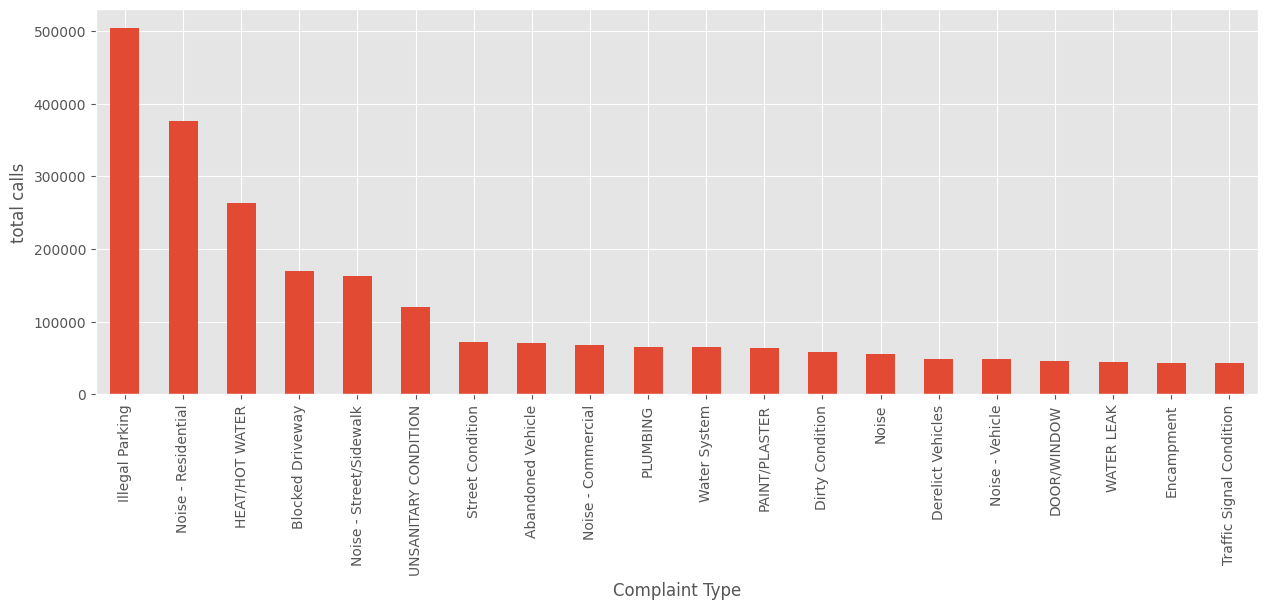

In [6]:
#plotting the overall top 20 complaint occurrences to get a sense of the data
complaint_counts[:20].plot(kind='bar', ylabel = "total calls")

In [7]:
#Group complaints by Bourough
borough_grp = complaints_filt.groupby(['Borough'])

In [10]:
#Count complaint types for each Borough and truncate to 'nlargest' values, reset index to drop redundant Borough index
complaints_top_by_borough = borough_grp['Complaint Type'].value_counts(normalize = False).groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
complaints_top_by_borough

Borough        Complaint Type         
BRONX          Noise - Residential        141510
               HEAT/HOT WATER              95190
               Illegal Parking             74178
               Noise - Street/Sidewalk     44189
               UNSANITARY CONDITION        40224
BROOKLYN       Illegal Parking            193092
               Noise - Residential         93723
               HEAT/HOT WATER              68188
               Blocked Driveway            63625
               Noise - Street/Sidewalk     39041
MANHATTAN      Illegal Parking             72849
               Noise - Residential         62752
               HEAT/HOT WATER              60693
               Noise - Street/Sidewalk     52502
               Encampment                  29304
QUEENS         Illegal Parking            149327
               Blocked Driveway            71485
               Noise - Residential         69172
               HEAT/HOT WATER              37051
               Abandoned Vehic

<Axes: xlabel='Borough', ylabel='total calls'>

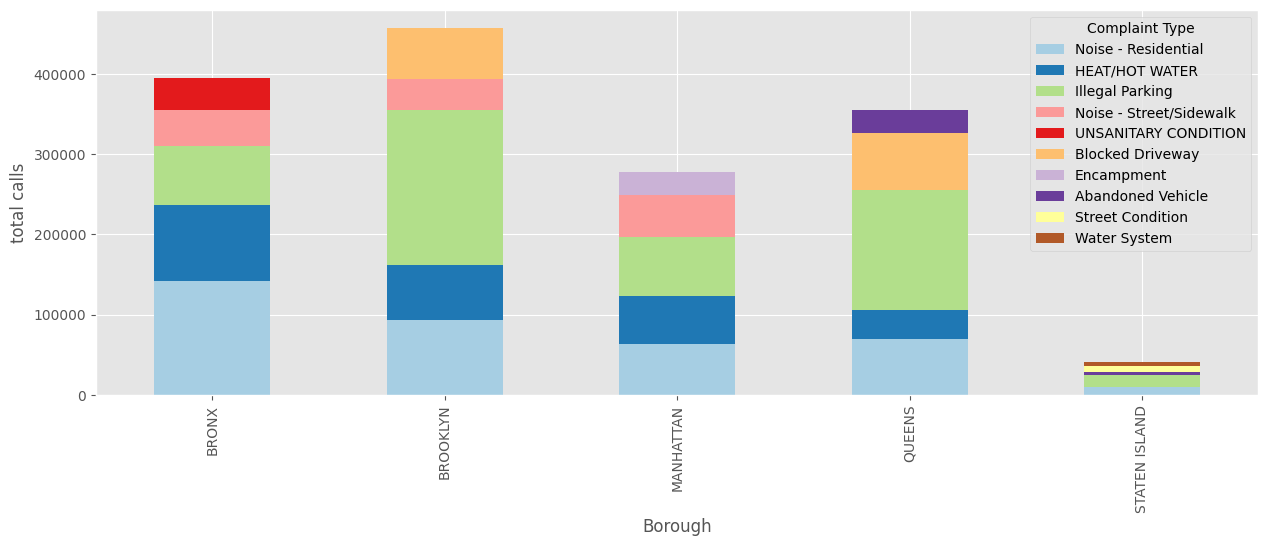

In [11]:
#create the bar plot of grouped data using unstack() function
complaints_top_by_borough.unstack().plot(stacked = True, kind='bar', ylabel = 'total calls', colormap='Paired')